#This is a Kaggle competition named Titanic Machine Learning From Disaster. 

[kaggle](https://www.kaggle.com/c/titanic)

###Dependencies:

* NumPy
* IPython
* Pandas
* SciKit-Learn
* Matplotlib

###This Notebook will show  examples of:

* Data Handling
* Importing Data with Pandas
* Cleaning Data
* Exploring Data through Visualizations with Matplotlib
* Data Analysis

###Supervised Machine learning Techniques:

* Logic Regression Model
* Plotting results
* Support Vector Machine 
* Random Forest

###Valuation of the Analysis

* K-folds cross validation to valuate results locally

###data：
titanic_test.csv

titanic_train.csv

###VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
                
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name            Name

sex             Sex

age             Age

sibsp           Number of Siblings/Spouses Aboard

parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
                

###SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [30]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
# plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression


trian_name = 'titanic_train.csv'
titanic = pd.read_csv(trian_name,dtype={"Age": np.float64}) #read data
titanic.head(5)  #preview the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe() # describe common statics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.info() #notes non-null count in Age，

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [31]:
#fill null 'age' with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

## explore data primal
* Survived
* Pclass
* Age vs Survived
* Age vs Pclass
* Embarked

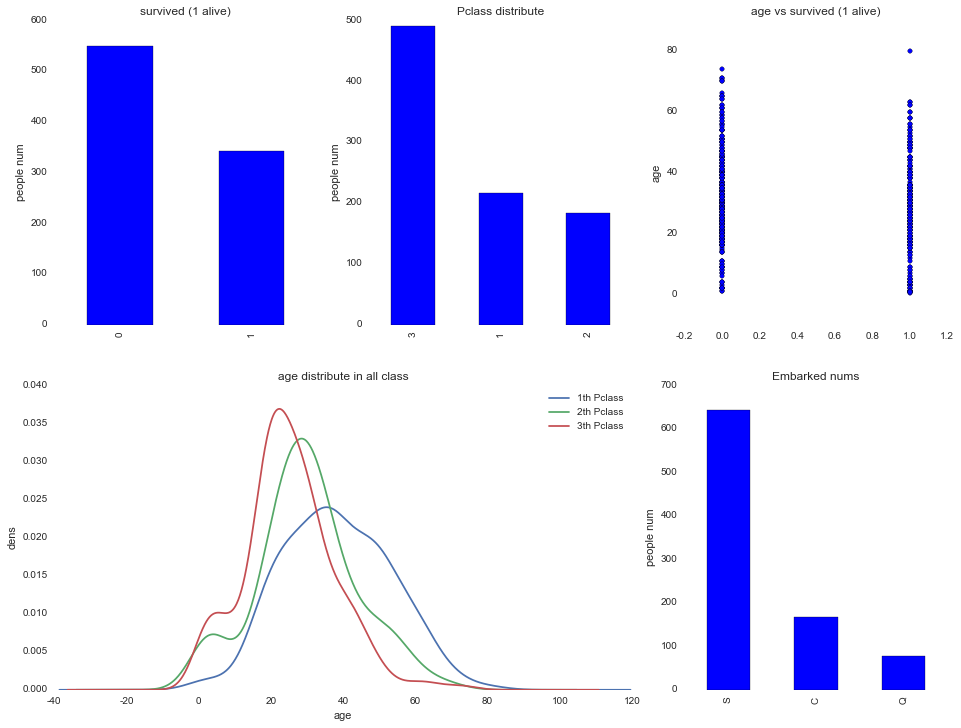

In [14]:
plt.figure(figsize=(16,12), dpi=80)
plt.subplot2grid((2,3),(0,0))             # split the mom pic
titanic.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title("survived (1 alive)") 
plt.ylabel("people num")  

plt.subplot2grid((2,3),(0,1))
titanic.Pclass.value_counts().plot(kind="bar")
plt.ylabel("people num") 
plt.title(u"Pclass distribute")

plt.subplot2grid((2,3),(0,2))
plt.scatter(titanic.Survived, titanic.Age)
plt.ylabel("age")                         
plt.grid(b=True, which='major', axis='y') 
plt.title("age vs survived (1 alive)")


plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
titanic.Age[titanic.Pclass == 1].plot(kind='kde')   
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.ylabel("dens") 
plt.title("age distribute in all class")
plt.legend(( '1th Pclass', '2th Pclass','3th Pclass'),loc='best') # sets legend


plt.subplot2grid((2,3),(1,2))
titanic.Embarked.value_counts().plot(kind='bar')
plt.title("Embarked nums")
plt.ylabel("people num")  
plt.show()

## explore data upgrade
* Pclass vs Survived
* Embarked vs Survived
* Sex vs Survived
* Sex vs Pclass vs Survived 

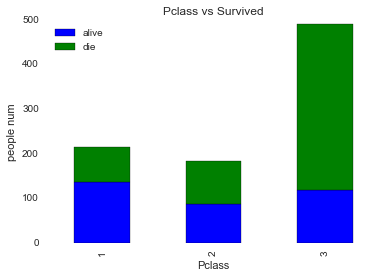

In [40]:
# Pclass vs Survived
fig = plt.figure(figsize=(10,8), dpi=80)
Survived_0 = titanic.Pclass[titanic.Survived == 0].value_counts()
Survived_1 = titanic.Pclass[titanic.Survived == 1].value_counts()
df=pd.DataFrame({'alive':Survived_1, 'die':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("Pclass vs Survived")
plt.xlabel("Pclass") 
plt.ylabel("people num") 
plt.show()

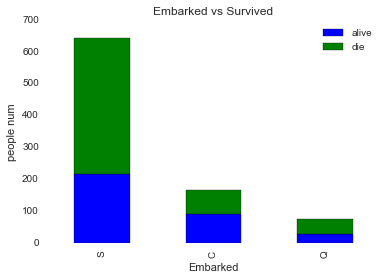

In [42]:
#Embarked vs Survived
fig = plt.figure(figsize=(10,8), dpi=80)
Survived_0 = titanic.Embarked[titanic.Survived == 0].value_counts()
Survived_1 = titanic.Embarked[titanic.Survived == 1].value_counts()
df=pd.DataFrame({'alive':Survived_1, 'die':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("Embarked vs Survived")
plt.xlabel("Embarked") 
plt.ylabel("people num") 
plt.show()

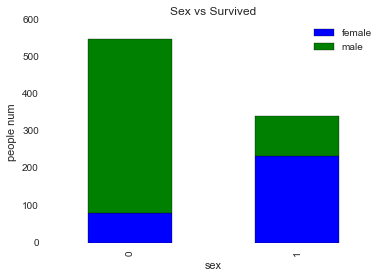

In [43]:
#Sex vs Survived
fig = plt.figure(figsize=(10,8), dpi=80)

Survived_m = titanic.Survived[titanic.Sex == 'male'].value_counts()
Survived_f = titanic.Survived[titanic.Sex == 'female'].value_counts()
df=pd.DataFrame({'male':Survived_m, 'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title("Sex vs Survived")
plt.xlabel("sex") 
plt.ylabel("people num")
plt.show()

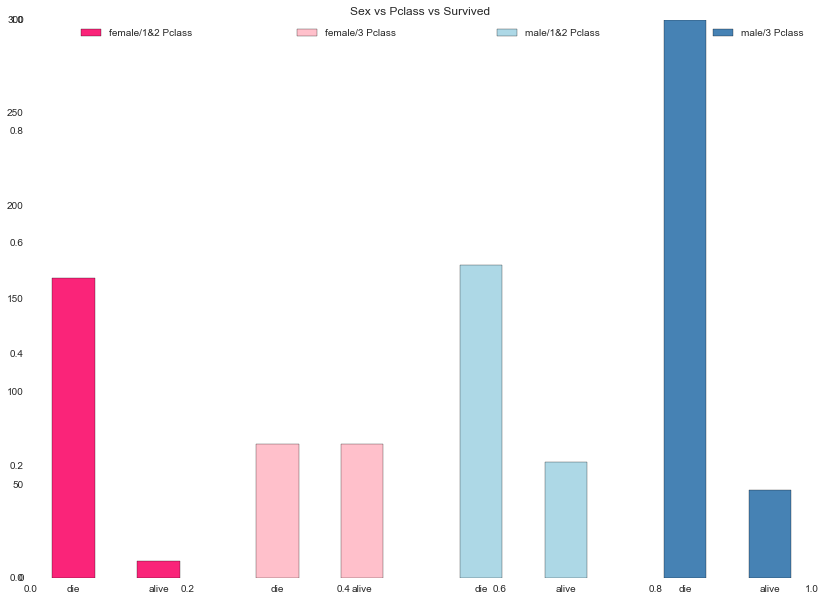

In [56]:
# Sex vs Pclass vs Survived 
fig=plt.figure(figsize=(14,10), dpi=80)
plt.title("Sex vs Pclass vs Survived ")

ax1=fig.add_subplot(141)
titanic.Survived[titanic.Sex == 'female'][titanic.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(["die" ,"alive"], rotation=0)
ax1.legend(["female/1&2 Pclass"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
titanic.Survived[titanic.Sex == 'female'][titanic.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels(["die" ,"alive"], rotation=0)
plt.legend(["female/3 Pclass"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
titanic.Survived[titanic.Sex == 'male'][titanic.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels(["die" ,"alive"], rotation=0)
plt.legend(["male/1&2 Pclass"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
titanic.Survived[titanic.Sex == 'male'][titanic.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels(["die" ,"alive"], rotation=0)
plt.legend(["male/3 Pclass"], loc='best')
plt.show()

In [58]:
# SibSp vs Survived
g = titanic.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [60]:
# Parch vs Survived
g = titanic.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [62]:
#decribe Cabin,most are single tag
titanic.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

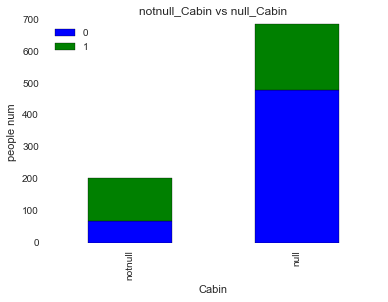

In [63]:
# notnull_Cabin vs null_Cabin vs Survived
fig = plt.figure(figsize=(10,8), dpi=80)

Survived_cabin = titanic.Survived[pd.notnull(titanic.Cabin)].value_counts()
Survived_nocabin = titanic.Survived[pd.isnull(titanic.Cabin)].value_counts()
df=pd.DataFrame({'notnull':Survived_cabin, 'null':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title("notnull_Cabin vs null_Cabin")
plt.xlabel("Cabin") 
plt.ylabel("people num")
plt.show()

## explore data by sns

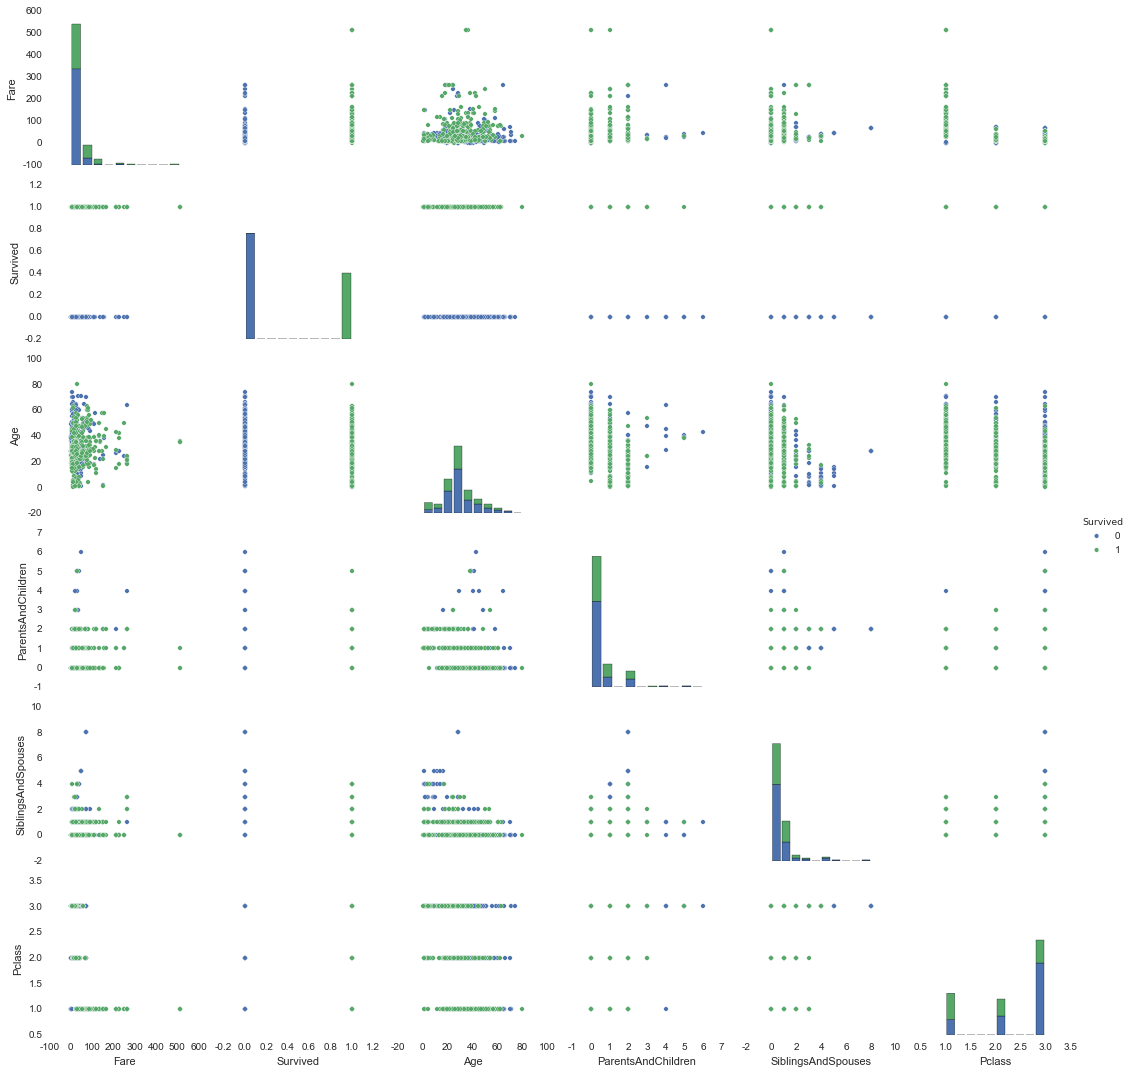

In [35]:
titanic["ParentsAndChildren"] = titanic["Parch"]
titanic["SiblingsAndSpouses"] = titanic["SibSp"]

plt.figure()
sns.pairplot(data=titanic[["Fare","Survived","Age","ParentsAndChildren","SiblingsAndSpouses","Pclass"]],
             hue="Survived", dropna=True)
plt.savefig("1_seaborn_pair_plot.png")

## feature encoding

In [65]:
#trans Sex
print(titanic['Sex'].unique())

titanic.loc[titanic['Sex']=='male','Sex'] = 0

titanic.loc[titanic['Sex']=='female','Sex'] = 1

#trans Embarked
print titanic['Embarked'].unique()

titanic['Embarked'] = titanic['Embarked'].fillna('S')

titanic.loc[titanic['Embarked']=='S','Embarked'] = 0
titanic.loc[titanic['Embarked']=='C','Embarked'] = 1
titanic.loc[titanic['Embarked']=='Q','Embarked'] = 2

['male' 'female']
['S' 'C' 'Q' nan]


## baseline learner---LR

In [70]:
#logistic regression
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
alg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
print('logistic regression: '+str(scores.mean()))

test_name = 'titanic_test.csv'
titanic_test = pd.read_csv(test_name)

titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

# Initialize the algorithm class
#alg = LogisticRegression(random_state=1)
alg = LogisticRegression(C=1.0, penalty='l1', tol=1e-6)

# Train the algorithm using all the training data
alg.fit(titanic[predictors], titanic["Survived"])

# Make predictions using the test set.
predictions = alg.predict(titanic_test[predictors])

logistic regression: 0.787878787879


In [ ]:
# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("kaggle.csv", index=False)

## feature correlation coefficent

In [81]:
pd.DataFrame({"columns":list(titanic[predictors]), "coef":list(alg.coef_.T)})

,coef,columns
0,[-1.03995969087],Pclass
1,[2.66152773741],Sex
2,[-0.0359820316626],Age
3,[-0.313861843419],SibSp
4,[-0.0753326519018],Parch
5,[0.00286136807798],Fare
6,[0.224416264739],Embarked


## feature engineering

In [ ]:
def clean_and_munge_data(df):
    #handle null
    df.Fare = df.Fare.map(lambda x: np.nan if x==0 else x)
    #handle title
    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                'Don', 'Jonkheer']
    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))

    #all in mr, mrs, miss, master
    def replace_titles(x):
        title=x['Title']
        if title in ['Mr','Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
            return 'Mr'
        elif title in ['Master']:
            return 'Master'
        elif title in ['Countess', 'Mme','Mrs']:
            return 'Mrs'
        elif title in ['Mlle', 'Ms','Miss']:
            return 'Miss'
        elif title =='Dr':
            if x['Sex']=='Male':
                return 'Mr'
            else:
                return 'Mrs'
        elif title =='':
            if x['Sex']=='Male':
                return 'Master'
            else:
                return 'Miss'
        else:
            return title

    df['Title']=df.apply(replace_titles, axis=1)

    #new feature family size 
    df['Family_Size']=df['SibSp']+df['Parch']
    df['Family']=df['SibSp']*df['Parch']


    df.loc[ (df.Fare.isnull())&(df.Pclass==1),'Fare'] =np.median(df[df['Pclass'] == 1]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==2),'Fare'] =np.median( df[df['Pclass'] == 2]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==3),'Fare'] = np.median(df[df['Pclass'] == 3]['Fare'].dropna())

    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

    df['AgeFill']=df['Age']
    mean_ages = np.zeros(4)
    mean_ages[0]=np.average(df[df['Title'] == 'Miss']['Age'].dropna())
    mean_ages[1]=np.average(df[df['Title'] == 'Mrs']['Age'].dropna())
    mean_ages[2]=np.average(df[df['Title'] == 'Mr']['Age'].dropna())
    mean_ages[3]=np.average(df[df['Title'] == 'Master']['Age'].dropna())
    df.loc[ (df.Age.isnull()) & (df.Title == 'Miss') ,'AgeFill'] = mean_ages[0]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Mrs') ,'AgeFill'] = mean_ages[1]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Mr') ,'AgeFill'] = mean_ages[2]
    df.loc[ (df.Age.isnull()) & (df.Title == 'Master') ,'AgeFill'] = mean_ages[3]

    df['AgeCat']=df['AgeFill']
    df.loc[ (df.AgeFill<=10) ,'AgeCat'] = 'child'
    df.loc[ (df.AgeFill>60),'AgeCat'] = 'aged'
    df.loc[ (df.AgeFill>10) & (df.AgeFill <=30) ,'AgeCat'] = 'adult'
    df.loc[ (df.AgeFill>30) & (df.AgeFill <=60) ,'AgeCat'] = 'senior'

    df.Embarked = df.Embarked.fillna('S')


    df.loc[ df.Cabin.isnull()==True,'Cabin'] = 0.5
    df.loc[ df.Cabin.isnull()==False,'Cabin'] = 1.5

    df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)

    #Age times class

    df['AgeClass']=df['AgeFill']*df['Pclass']
    df['ClassFare']=df['Pclass']*df['Fare_Per_Person']


    df['HighLow']=df['Pclass']
    df.loc[ (df.Fare_Per_Person<8) ,'HighLow'] = 'Low'
    df.loc[ (df.Fare_Per_Person>=8) ,'HighLow'] = 'High'
    
    le.fit(df['Sex'] )
    x_sex=le.transform(df['Sex'])
    df['Sex']=x_sex.astype(np.float)

    le.fit( df['Ticket'])
    x_Ticket=le.transform( df['Ticket'])
    df['Ticket']=x_Ticket.astype(np.float)

    le.fit(df['Title'])
    x_title=le.transform(df['Title'])
    df['Title'] =x_title.astype(np.float)

    le.fit(df['HighLow'])
    x_hl=le.transform(df['HighLow'])
    df['HighLow']=x_hl.astype(np.float)


    le.fit(df['AgeCat'])
    x_age=le.transform(df['AgeCat'])
    df['AgeCat'] =x_age.astype(np.float)

    le.fit(df['Embarked'])
    x_emb=le.transform(df['Embarked'])
    df['Embarked']=x_emb.astype(np.float)

    df = df.drop(['PassengerId','Name','Age','Cabin'], axis=1) #remove Name,Age and PassengerId


    return df

# score func
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

## fit the classification

In [ ]:
traindf=pd.read_csv(train_file)
#clean data
df=clean_and_munge_data(traindf)
########################################formula################################
 
formula_ml='Survived~Pclass+C(Title)+Sex+C(AgeCat)+Fare_Per_Person+Fare+Family_Size' 

y_train, x_train = dmatrices(formula_ml, data=df, return_type='dataframe')
y_train = np.asarray(y_train).ravel()
print y_train.shape,x_train.shape

##train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2,random_state=seed)
#inite data
clf=RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=1,
  min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, n_jobs=1, random_state=seed,
  verbose=0)

###grid search find the best parameter 
param_grid = dict( )
##create pipeline
pipeline=Pipeline([ ('clf',clf) ])
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=3,scoring='accuracy',\
cv=StratifiedShuffleSplit(Y_train, n_iter=10, test_size=0.2, train_size=None, indices=None, \
random_state=seed, n_iterations=None)).fit(X_train, Y_train)
# show train score
print("Best score: %0.3f" % grid_search.best_score_)
print(grid_search.best_estimator_)
report(grid_search.grid_scores_)
 
print('-----grid search end------------')
print ('on all train set')
scores = cross_val_score(grid_search.best_estimator_, x_train, y_train,cv=3,scoring='accuracy')
print scores.mean(),scores
print ('on test set')
scores = cross_val_score(grid_search.best_estimator_, X_test, Y_test,cv=3,scoring='accuracy')
print scores.mean(),scores

# show test score

print(classification_report(Y_train, grid_search.best_estimator_.predict(X_train) ))
print('test data')
print(classification_report(Y_test, grid_search.best_estimator_.predict(X_test) ))

model_file=MODEL_PATH+'model-rf.pkl'
joblib.dump(grid_search.best_estimator_, model_file)